# Home Credit Data Scientist Assignment

## Read Raw Data

In [1]:
import pandas as pd

file_path = 'data\it_data.csv'

df_raw = pd.read_csv(file_path)

df_raw.head()

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,CATEGORICAL_2,CATEGORICAL_3,CATEGORICAL_4,CATEGORICAL_5,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04.04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,AB,DF,JK,TR,C,A,BB,AA,NFAYV,1
1,1,2014-06-20 11:05:39.39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,AA,DF,JK,WE,A,A,AA,BB,NFAYV,0
2,2,2014-06-20 11:07:00.00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,AB,AS,GH,TR,C,C,BB,BB,NFAYV,0
3,3,2014-06-20 11:09:38.38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,AB,AS,GH,TR,A,A,AA,BB,HNPAK,0
4,4,2014-06-20 11:11:10.10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,NaN,NaN,NaN,NaN,B,B,BB,BB,NFAYV,0


In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 56 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_APPLICATION  200000 non-null  int64  
 1   TIME            200000 non-null  object 
 2   NUMERICAL_0     200000 non-null  float64
 3   NUMERICAL_1     200000 non-null  float64
 4   NUMERICAL_2     200000 non-null  float64
 5   NUMERICAL_3     200000 non-null  float64
 6   NUMERICAL_4     200000 non-null  float64
 7   NUMERICAL_5     200000 non-null  float64
 8   NUMERICAL_6     200000 non-null  float64
 9   NUMERICAL_7     200000 non-null  float64
 10  NUMERICAL_8     200000 non-null  float64
 11  NUMERICAL_9     200000 non-null  float64
 12  NUMERICAL_10    143749 non-null  float64
 13  NUMERICAL_11    200000 non-null  float64
 14  NUMERICAL_12    200000 non-null  float64
 15  NUMERICAL_13    200000 non-null  float64
 16  NUMERICAL_14    200000 non-null  float64
 17  NUMERICAL_

In [3]:
df_raw_col = df_raw.columns
df_raw_col

Index(['ID_APPLICATION', 'TIME', 'NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2',
       'NUMERICAL_3', 'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6',
       'NUMERICAL_7', 'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_10',
       'NUMERICAL_11', 'NUMERICAL_12', 'NUMERICAL_13', 'NUMERICAL_14',
       'NUMERICAL_15', 'NUMERICAL_16', 'NUMERICAL_17', 'NUMERICAL_18',
       'NUMERICAL_19', 'NUMERICAL_20', 'NUMERICAL_21', 'NUMERICAL_22',
       'NUMERICAL_23', 'NUMERICAL_24', 'NUMERICAL_25', 'NUMERICAL_26',
       'NUMERICAL_27', 'NUMERICAL_28', 'NUMERICAL_29', 'NUMERICAL_30',
       'NUMERICAL_31', 'NUMERICAL_32', 'NUMERICAL_33', 'NUMERICAL_34',
       'NUMERICAL_35', 'NUMERICAL_36', 'NUMERICAL_37', 'NUMERICAL_38',
       'NUMERICAL_39', 'NUMERICAL_40', 'NUMERICAL_41', 'CATEGORICAL_0',
       'CATEGORICAL_1', 'CATEGORICAL_2', 'CATEGORICAL_3', 'CATEGORICAL_4',
       'CATEGORICAL_5', 'CATEGORICAL_6', 'CATEGORICAL_7', 'CATEGORICAL_8',
       'CATEGORICAL_9', 'CATEGORICAL_10', 'TARGET'],
      dtype='ob

## Filling Null
Numerical -> Try 0, then mean to see which one is better

Categorical -> fill 'unknown'

In [4]:
# Numerical -> 0
# Categorical -> 'unknown'
for c in df_raw_col:
    if df_raw[c].isnull().any():

        # Numerical -> 0
        if 'NUMERICAL' in c:
            df_raw.fillna(value={c: 0}, inplace=True)

        # Categorical -> 'unknown'
        else:
            df_raw.fillna(value={c: 'unkown'}, inplace=True)


In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 56 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_APPLICATION  200000 non-null  int64  
 1   TIME            200000 non-null  object 
 2   NUMERICAL_0     200000 non-null  float64
 3   NUMERICAL_1     200000 non-null  float64
 4   NUMERICAL_2     200000 non-null  float64
 5   NUMERICAL_3     200000 non-null  float64
 6   NUMERICAL_4     200000 non-null  float64
 7   NUMERICAL_5     200000 non-null  float64
 8   NUMERICAL_6     200000 non-null  float64
 9   NUMERICAL_7     200000 non-null  float64
 10  NUMERICAL_8     200000 non-null  float64
 11  NUMERICAL_9     200000 non-null  float64
 12  NUMERICAL_10    200000 non-null  float64
 13  NUMERICAL_11    200000 non-null  float64
 14  NUMERICAL_12    200000 non-null  float64
 15  NUMERICAL_13    200000 non-null  float64
 16  NUMERICAL_14    200000 non-null  float64
 17  NUMERICAL_

In [23]:
df_raw[['CATEGORICAL_4', 'NUMERICAL_10']].sample(20)

,CATEGORICAL_4,NUMERICAL_10
6279,unkown,-0.661340
111008,JK,0.000000
143495,JK,0.323206
55328,GH,-1.924043
27140,unkown,-0.328819
192000,GH,1.561352
100404,unkown,0.000000
191403,GH,-0.475848
151857,JK,-0.788265
35456,unkown,2.839040


## Handle DateTime
Add:
- Date: yyyy-MM-dd
- Month: yyyy-MM
- Months Columns: month_1, month_2...
- Dates Columns: date_1, date_2...
- DOW Columns: dow_0, dow_1...
- Is Holiday: 0, 1
- Days Before next holiday
- Days After last holiday
- Hour: HH

In [5]:
df_raw['TIME_FORMAT'] = pd.to_datetime(df_raw['TIME'])

df_raw['DATE_APPLICATION'] = df_raw['TIME_FORMAT'].dt.date
df_raw['YEAR_MONTH_APPLICATION'] = df_raw['TIME_FORMAT'].dt.strftime('%b %Y')

df_raw['YEAR_APPLICATION'] = df_raw['TIME_FORMAT'].dt.year
df_raw['MONTH_APPLICATION'] = df_raw['TIME_FORMAT'].dt.month
df_raw['DAY_APPLICATION'] = df_raw['TIME_FORMAT'].dt.day
df_raw['DOW_APPLICATION'] = df_raw['TIME_FORMAT'].dt.day_of_week

time_col = ['TIME', 'TIME_FORMAT', 'DATE_APPLICATION', 'YEAR_MONTH_APPLICATION', 'YEAR_APPLICATION', 'MONTH_APPLICATION', 'DAY_APPLICATION', 'DOW_APPLICATION']

df_raw[time_col].head()

,TIME,TIME_FORMAT,DATE_APPLICATION,YEAR_MONTH_APPLICATION,YEAR_APPLICATION,MONTH_APPLICATION,DAY_APPLICATION,DOW_APPLICATION
0,2014-06-20 11:03:04.04,2014-06-20 11:03:04.040,2014-06-20,Jun 2014,2014,6,20,4
1,2014-06-20 11:05:39.39,2014-06-20 11:05:39.390,2014-06-20,Jun 2014,2014,6,20,4
2,2014-06-20 11:07:00.00,2014-06-20 11:07:00.000,2014-06-20,Jun 2014,2014,6,20,4
3,2014-06-20 11:09:38.38,2014-06-20 11:09:38.380,2014-06-20,Jun 2014,2014,6,20,4
4,2014-06-20 11:11:10.10,2014-06-20 11:11:10.100,2014-06-20,Jun 2014,2014,6,20,4


## Data Distribution

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Time range

### Histogram

In [14]:
exclude_col_hist = time_col + ['ID_APPLICATION']


features =  list(set(df_raw_col).difference(exclude_col_hist))

features.sort()

cat_features = [x for x in features if 'CATEGORICAL' in x]
num_features = [x for x in features if 'NUMERICAL' in x]

print(features)
print(cat_features)
print(num_features)

['CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_10', 'CATEGORICAL_2', 'CATEGORICAL_3', 'CATEGORICAL_4', 'CATEGORICAL_5', 'CATEGORICAL_6', 'CATEGORICAL_7', 'CATEGORICAL_8', 'CATEGORICAL_9', 'NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_10', 'NUMERICAL_11', 'NUMERICAL_12', 'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15', 'NUMERICAL_16', 'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19', 'NUMERICAL_2', 'NUMERICAL_20', 'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23', 'NUMERICAL_24', 'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27', 'NUMERICAL_28', 'NUMERICAL_29', 'NUMERICAL_3', 'NUMERICAL_30', 'NUMERICAL_31', 'NUMERICAL_32', 'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35', 'NUMERICAL_36', 'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39', 'NUMERICAL_4', 'NUMERICAL_40', 'NUMERICAL_41', 'NUMERICAL_5', 'NUMERICAL_6', 'NUMERICAL_7', 'NUMERICAL_8', 'NUMERICAL_9', 'TARGET']
['CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_10', 'CATEGORICAL_2', 'CATEGORICAL_3', 'CATEGORICAL_4', 'CATEGORICAL_5', 'CATEGORICAL_6', '

w:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
w:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
w:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
w:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

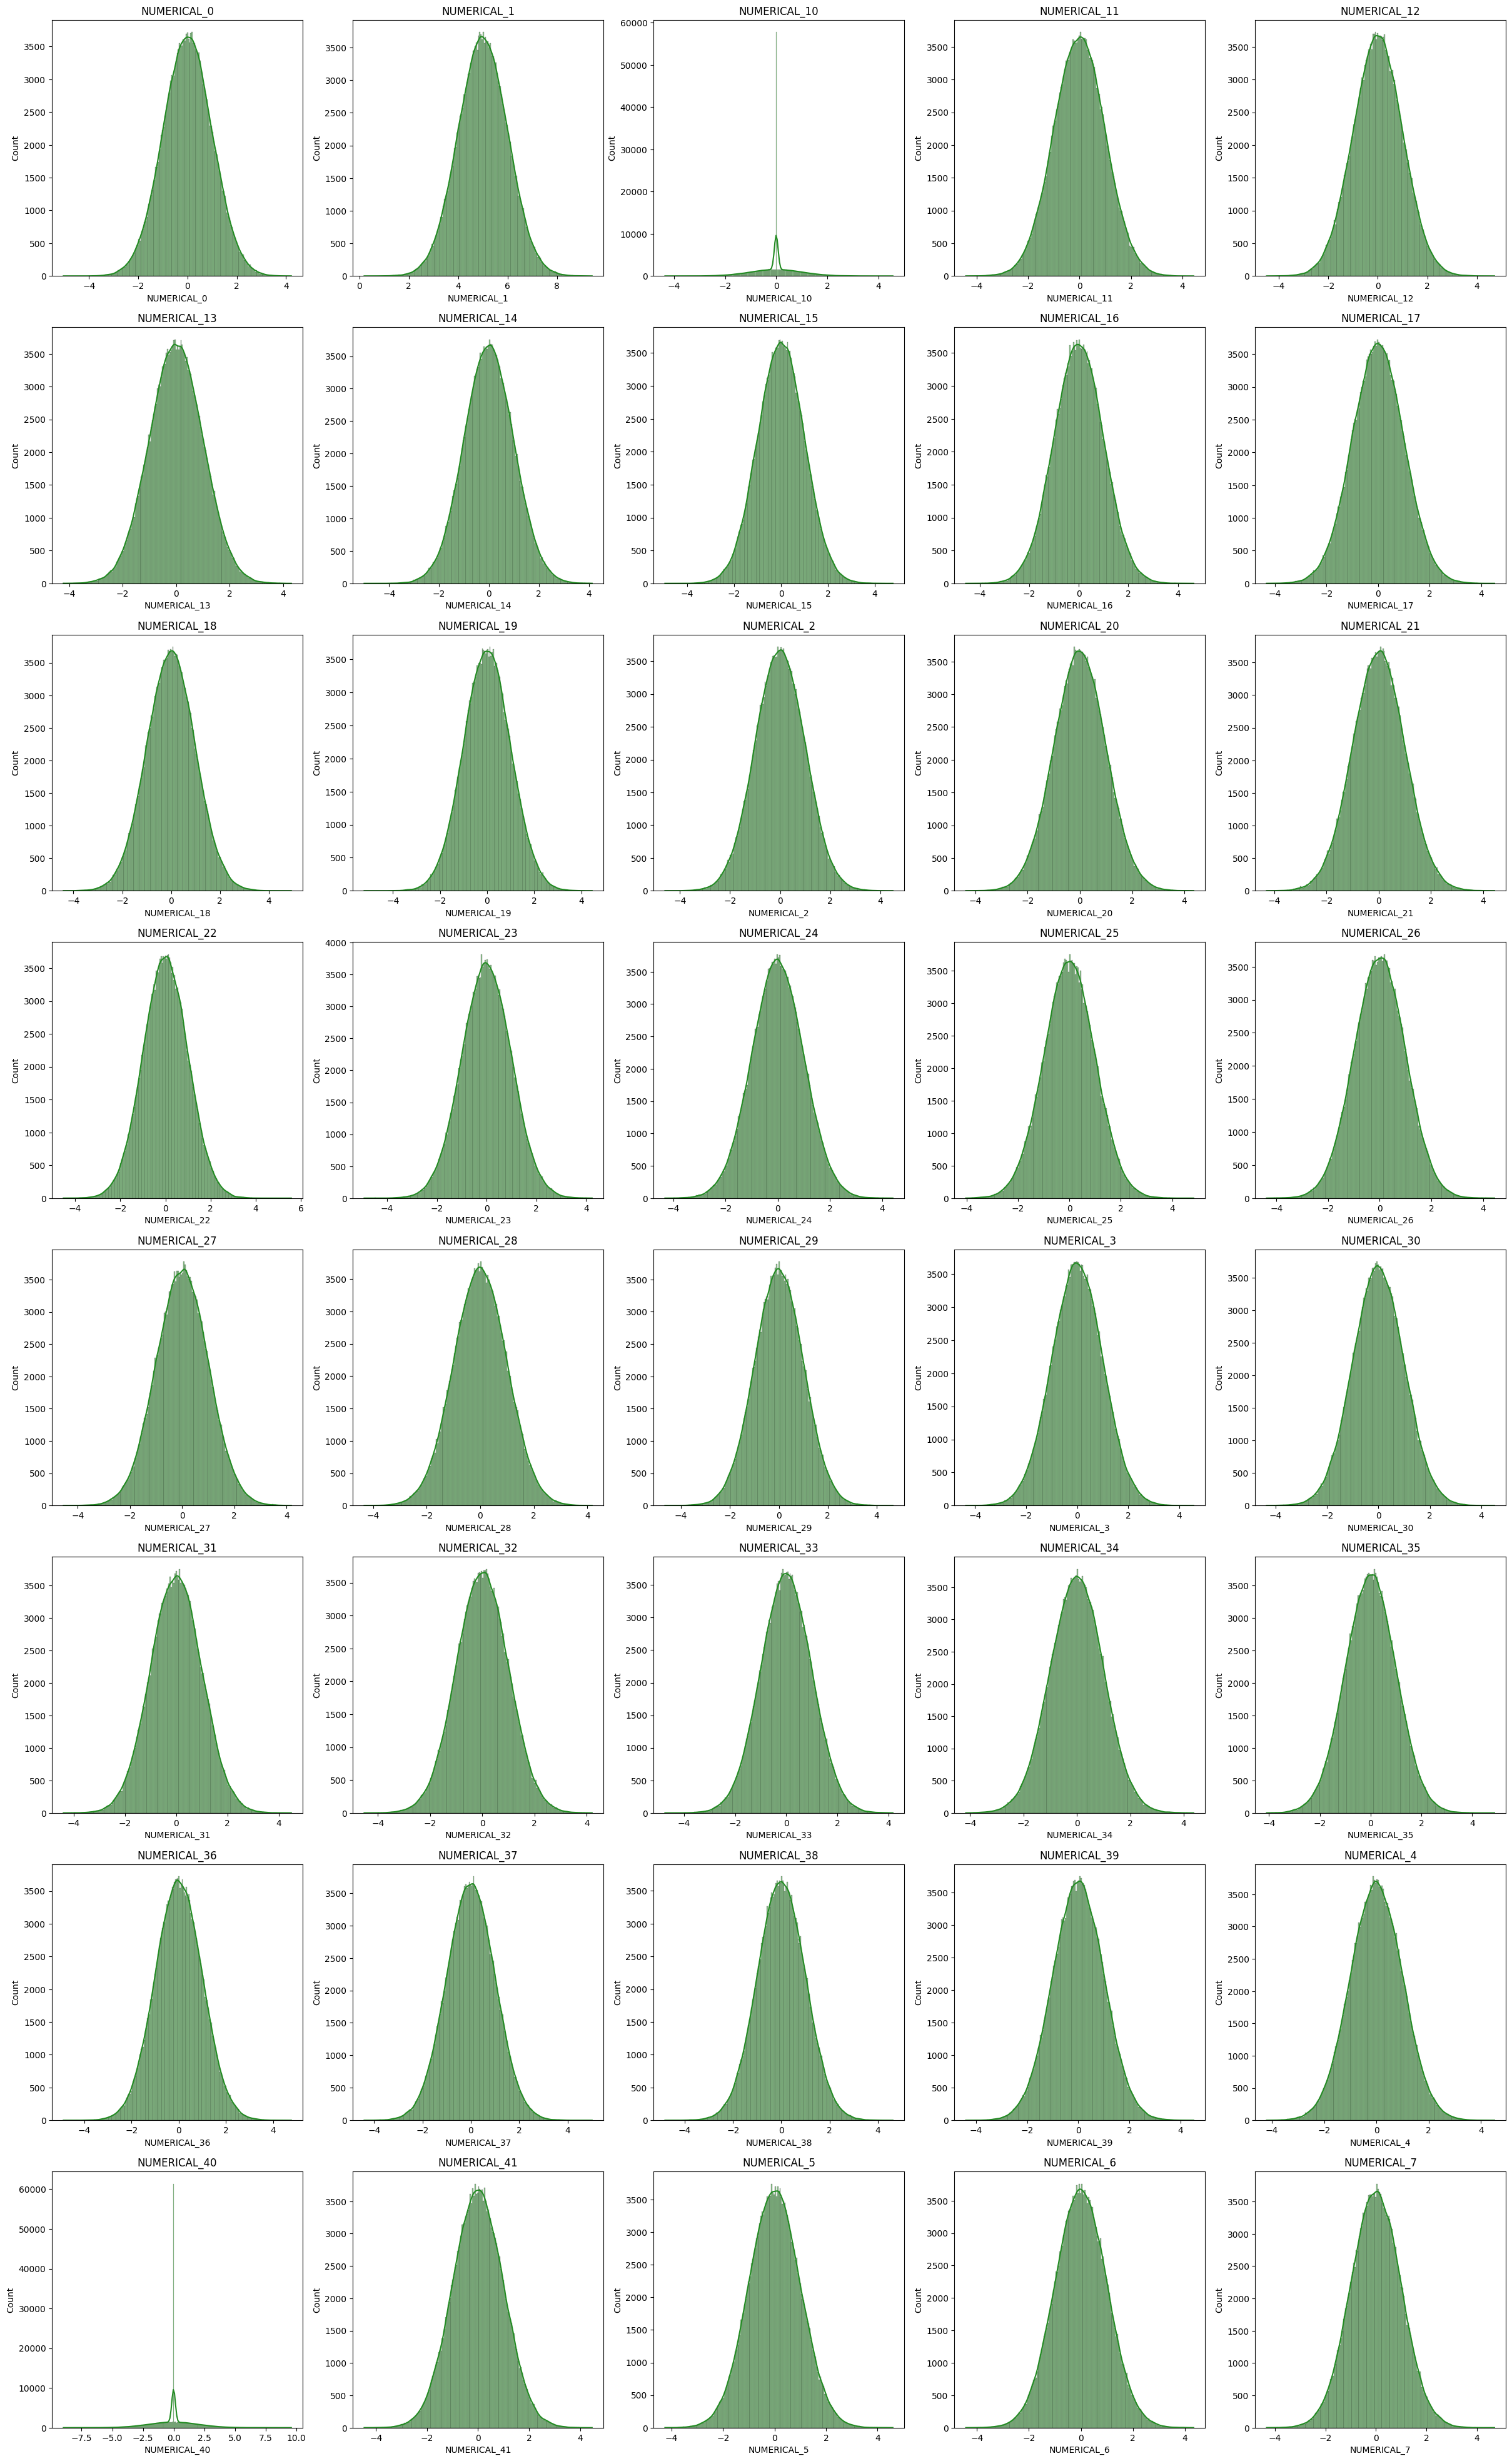

In [16]:
fig, axes = plt.subplots(nrows = 8, ncols = 5)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 50)

for ax, col in zip(axes, num_features):
  sns.histplot(df_raw[col], ax = ax, color='forestgreen', kde=True)
  ax.set_title(col)